In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('D:/Data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


<AxesSubplot:xlabel='placement_exam_marks'>

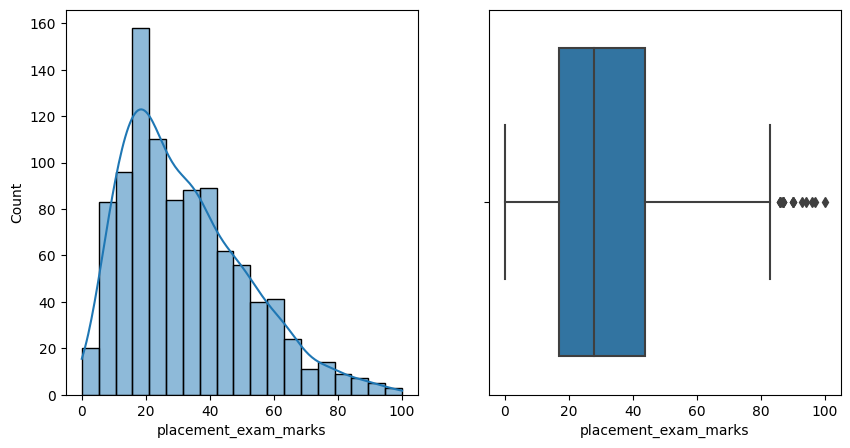

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['placement_exam_marks'])

In [4]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [5]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# Finding the IQR

In [9]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [10]:
iqr=percentile75-percentile25

In [11]:
iqr

27.0

In [12]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [13]:
upper_limit

84.5

# Finding Outlier

In [ ]:
df[df['placement_exam_marks'] >upper_limit]

In [15]:
df[df['placement_exam_marks'] <lower_limit]

,cgpa,placement_exam_marks,placed


# Now apply Trimming

In [17]:
df0=df[df['placement_exam_marks']<upper_limit]

In [18]:
df0

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


# Now Compare

<AxesSubplot:xlabel='placement_exam_marks'>

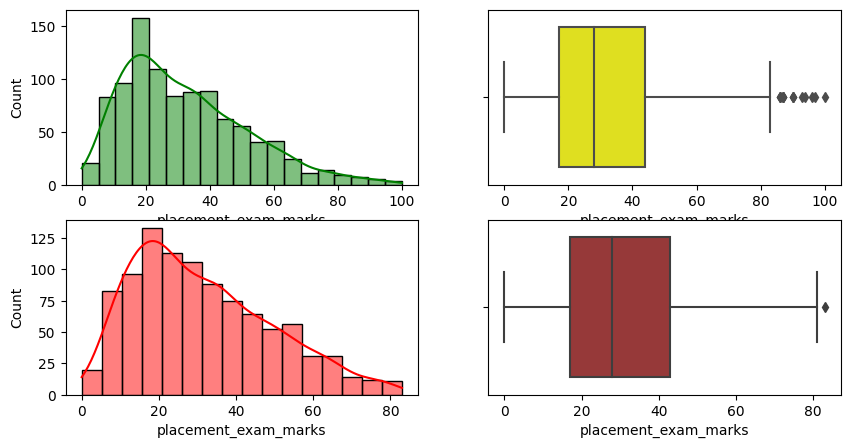

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,color='green')
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'],color='yellow')
plt.subplot(2,2,3)
sns.histplot(df0['placement_exam_marks'],kde=True,color='red')
plt.subplot(2,2,4)
sns.boxplot(x=df0['placement_exam_marks'],color='brown')

# Capping

In [34]:
df1=df.copy()

In [35]:
df1['placement_exam_marks']=np.where(
    df1['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
    df1['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [36]:
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# Shape is same means no any row remove

# Compare

<AxesSubplot:xlabel='placement_exam_marks'>

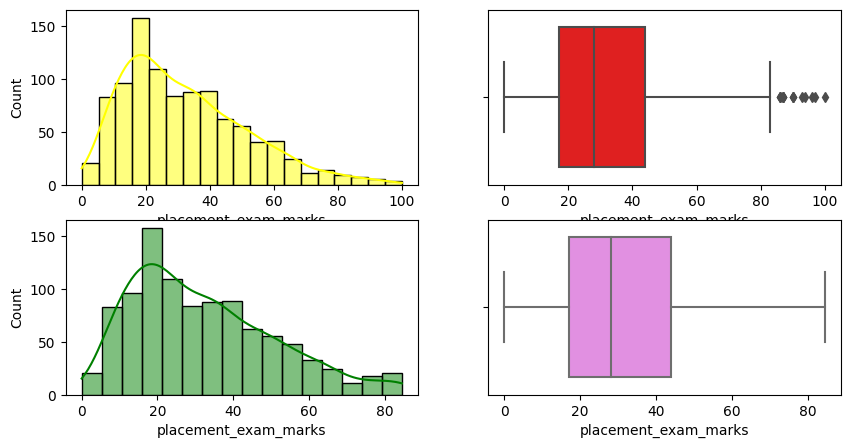

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,color='yellow')
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'],color='red')
plt.subplot(2,2,3)
sns.histplot(df1['placement_exam_marks'],kde=True,color='green')
plt.subplot(2,2,4)
sns.boxplot(x=df1['placement_exam_marks'],color='violet')